# 2.
## Delete column(s), set dataframe header as index, groupby()

In [2]:
import pandas as pd

In [3]:
# df = pd.read_csv('https://bit.ly/3sTOUz5')
df = pd.read_excel('https://bit.ly/3sVdlfw')

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24345 entries, 0 to 24344
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            24345 non-null  int64         
 1   CaseCount             24345 non-null  int64         
 2   Gender                24345 non-null  object        
 3   AgeDecade             24345 non-null  object        
 4   Municipality          24345 non-null  object        
 5   Community             24345 non-null  object        
 6   DateReported          24345 non-null  datetime64[ns]
 7   EstimatedDateofOnset  24345 non-null  datetime64[ns]
 8   Acquisition           24345 non-null  object        
 9   Status                24345 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 9.9 MB


In [5]:
# change data in 'AgeDecade' and convert type to numeric
old_data = ['100s','90s','80s','70s','60s','50s','40s','30s','20s','Under 20']
new_data = ['100','90','80','70','60','50','40','30','20','10']
df['AgeDecade'] = df['AgeDecade'].replace(old_data,new_data)
df['AgeDecade'] = pd.to_numeric(df['AgeDecade'])

In [6]:
df.AgeDecade.head()

0    30
1    60
2    70
3    50
4    40
Name: AgeDecade, dtype: int64

In [7]:
df.head()

,Unnamed: 0,CaseCount,Gender,AgeDecade,Municipality,Community,DateReported,EstimatedDateofOnset,Acquisition,Status
0,0,24413,Female,30,Richmond Hill,Richmond Hill,2020-02-29,2020-02-27,Travel,Resolved
1,1,24414,Female,60,Richmond Hill,Richmond Hill,2020-03-02,2020-02-29,Travel,Resolved
2,2,24415,Female,70,Richmond Hill,Richmond Hill,2020-03-03,2020-02-29,Travel,Resolved
3,3,24416,Male,50,Vaughan,Maple,2020-03-04,2020-02-27,Travel,Resolved
4,4,24417,Male,40,Richmond Hill,Richmond Hill,2020-03-04,2020-02-28,Travel,Resolved


### delete column

In [15]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
df.head()

,CaseCount,Gender,AgeDecade,Municipality,Community,DateReported,EstimatedDateofOnset,Acquisition,Status
0,24413,Female,30,Richmond Hill,Richmond Hill,2020-02-29,2020-02-27,Travel,Resolved
1,24414,Female,60,Richmond Hill,Richmond Hill,2020-03-02,2020-02-29,Travel,Resolved
2,24415,Female,70,Richmond Hill,Richmond Hill,2020-03-03,2020-02-29,Travel,Resolved
3,24416,Male,50,Vaughan,Maple,2020-03-04,2020-02-27,Travel,Resolved
4,24417,Male,40,Richmond Hill,Richmond Hill,2020-03-04,2020-02-28,Travel,Resolved


### set DateReported as index

In [17]:
df.set_index('DateReported', inplace=True)

In [18]:
df

,CaseCount,Gender,AgeDecade,Municipality,Community,EstimatedDateofOnset,Acquisition,Status
DateReported,,,,,,,,
2020-02-29,24413,Female,30,Richmond Hill,Richmond Hill,2020-02-27,Travel,Resolved
2020-03-02,24414,Female,60,Richmond Hill,Richmond Hill,2020-02-29,Travel,Resolved
2020-03-03,24415,Female,70,Richmond Hill,Richmond Hill,2020-02-29,Travel,Resolved
2020-03-04,24416,Male,50,Vaughan,Maple,2020-02-27,Travel,Resolved
2020-03-04,24417,Male,40,Richmond Hill,Richmond Hill,2020-02-28,Travel,Resolved
...,...,...,...,...,...,...,...,...
2021-01-23,48753,Male,10,Richmond Hill,Richmond Hill,2021-01-21,Close Contact,Self-Isolating
2021-01-23,48754,Male,20,Georgina,Georgina,2021-01-21,Close Contact,Self-Isolating
2021-01-23,48755,Female,10,Markham,Markham,2021-01-22,Local Transmission,Self-Isolating


<AxesSubplot:xlabel='DateReported'>

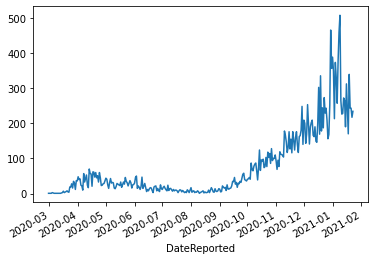

In [22]:
df.groupby('DateReported').Municipality.count().plot()

### get Acquisition count for York Region

<AxesSubplot:xlabel='Acquisition'>

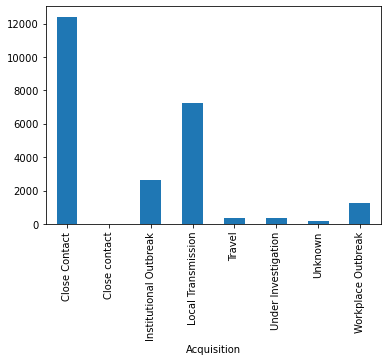

In [27]:
df.groupby('Acquisition').Municipality.count().plot(kind='bar')

### get unique values for a column

In [29]:
df.Municipality.unique()

array(['Richmond Hill', 'Vaughan', 'Newmarket', 'Markham', 'Aurora',
       'East Gwillimbury', 'Whitchurch-Stouffville', 'King', 'Georgina',
       'Other'], dtype=object)

### get Acquisition count by Municipality

<AxesSubplot:title={'center':'King'}, xlabel='Acquisition'>

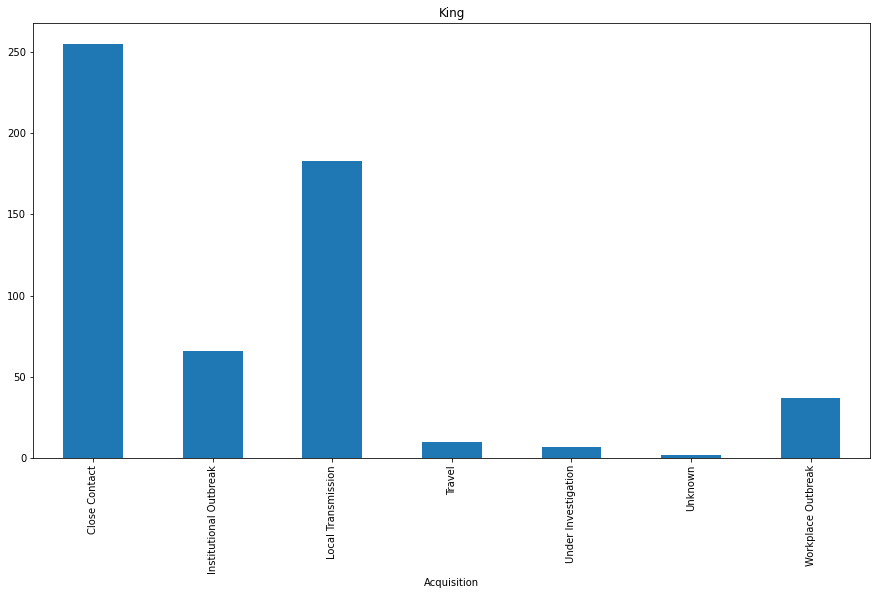

In [32]:
mun = 'King'
df[df['Municipality']==mun].groupby('Acquisition').Municipality.count().plot(kind='bar', figsize=(15,8), title=mun)